<a href="https://colab.research.google.com/github/AbubakarAbdulsalam/COMP4102_Project/blob/master/TrainedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.5

     |████████████████████████████████| 44.4MB 91kB/s 
     |████████████████████████████████| 3.0MB 43.6MB/s 
     |████████████████████████████████| 890kB 46.3MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=7a7d8811da281a05fd58321b6fc3270e6de01418abce3638ff3186702ee096e3
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.4
    Uninstalling bleach-3.1.4:
      Successfully uninstalled bleach-3.1.4
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [2]:
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, GlobalAveragePooling2D, Flatten, Activation, Dropout
from keras.models import Model
from google.colab import drive
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from keras.applications.inception_v3 import  preprocess_input
from keras.models import Model
import keras 

from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import random

dataset = {}
path = "drive/My Drive/NBA Logos/"
buildingCodes = ["76ers", "Bucks", "Bulls", "Cavaliers",
                 "Celtics", "Clippers", "Grizzlies",
                 "Hawks", "Heat", "Hornets", "Jazz",
                 "Kings", "Knicks", "Lakers",
                 "Magic", "Mavericks", "Nets", "Nuggets",
                 "Pacers", "Pelicans", "Pistons", "Raptors",
                 "Rockets", "Spurs", "Suns", "Thunder", "Timberwolves"
                 ,"Trailblazers", "Warriors", "Wizards"]

In [0]:
# For each folder representing  an NBA team, grab all images 
# randomly pick 5 images each to use for validation and testing
# assign the rest of the image to training
from glob import glob
import random

for building in buildingCodes:
  picts = glob(path + str(building) + "/*.jpg")
  picts = picts + glob(path + str(building) + "/*.jpeg")
  picts = picts + glob(path + str(building) + "/*.png")
  test = []
 
  validation = []
  for i in range(5):
    randIndex = random.randint(0,len(picts)-1)
    test.append(picts.pop(randIndex))
    validation.append(picts.pop(-randIndex))
  
  dataset[building] = [picts, test, validation]

In [0]:
#create pandas DataFrames from the group of images: train, test, validation
import pandas as pd
train = pd.DataFrame(columns=["x_col", "y_col"])
test = pd.DataFrame(columns=["x_col", "y_col"])
validation = pd.DataFrame(columns=["x_col", "y_col"])

for key in dataset:
  labels = [key] * len(dataset[key][0])
  data = {"x_col":dataset[key][0], "y_col":labels}
  sample_train = pd.DataFrame(data)
  
  train = train.append(sample_train, ignore_index=True)

  #test 
  labels = [key] * len(dataset[key][1])
  data = {"x_col": dataset[key][1], "y_col":labels}
  sample_test = pd.DataFrame(data)
  test = test.append(sample_test, ignore_index=True)

  #validation
  labels = [key] * len(dataset[key][2])
  data = {"x_col": dataset[key][2], "y_col": labels}
  sample_validation = pd.DataFrame(data)
  validation = validation.append(sample_validation, ignore_index=True)

In [6]:
train.head()

,x_col,y_col
0,drive/My Drive/NBA Logos/76ers/76ers-10.jpg,76ers
1,drive/My Drive/NBA Logos/76ers/76ers-11.jpg,76ers
2,drive/My Drive/NBA Logos/76ers/76ers-18.jpg,76ers
3,drive/My Drive/NBA Logos/76ers/76ers-12.jpg,76ers
4,drive/My Drive/NBA Logos/76ers/76ers-19.jpg,76ers


In [0]:
#create a convolutional neural network model 
image_input = Input((500,500,3))
image_model = Conv2D(64,(10,10), strides=(4,4))(image_input)
image_model = Activation('relu')(image_model)
image_model = Conv2D(128,(4,4))(image_input)
image_model = Activation('relu')(image_model)
image_model = MaxPooling2D(pool_size=(3,3))(image_model)
image_model = Conv2D(32,(3,3))(image_input)
image_model = Activation('relu')(image_model)
image_model = Conv2D(32,(3,3), strides=(2,2))(image_model)
image_model = Activation('relu')(image_model)
image_model = MaxPooling2D(pool_size=(3,3))(image_model)
image_model = Conv2D(32,(3,3), strides=(2,2))(image_model)
image_model = Activation('relu')(image_model)
image_model = Conv2D(32,(3,3), strides=(1,1))(image_model)
image_model = Activation('relu')(image_model)
image_model = MaxPooling2D(pool_size=(3,3))(image_model)
image_model = Dropout(0.5)(image_model)
image_model = Flatten()(image_model)
image_model = Dense(250)(image_model)
image_model = Activation('relu')(image_model)



output = Dense(30, activation='softmax')(image_model)

model = Model(inputs=image_input, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500, 500, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 498, 498, 32)      896       
_________________________________________________________________
activation_3 (Activation)    (None, 498, 498, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 248, 248, 32)      9248      
_________________________________________________________________
activation_4 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 82, 82, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 32)        9248

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input


# data prep
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2) 
                                   
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2) 

train_generator = train_datagen.flow_from_dataframe(train,x_col= "x_col", y_col = "y_col", 
                                                    classes = buildingCodes, target_size=(500,500), 
                                                    batch_size = 50) 

validation_generator = validation_datagen.flow_from_dataframe(validation,x_col= "x_col", 
                                                              y_col = "y_col", classes = buildingCodes, 
                                                              target_size=(500,500), batch_size = 24)

Found 395 validated image filenames belonging to 30 classes.
Found 150 validated image filenames belonging to 30 classes.


In [0]:
#training the model
EPOCHS = 20
STEPS_PER_EPOCH = 56
VALIDATION_STEPS = 10

MODEL_FILE = 'model.json'

history = model.fit_generator(train_generator, steps_per_epoch = STEPS_PER_EPOCH,
                              epochs = EPOCHS, validation_data = validation_generator,
                              validation_steps = VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


56/56 [==============================] - 1755s 31s/step - loss: 3.0166 - acc: 0.1419 - val_loss: 2.5673 - val_acc: 0.2658
Epoch 2/20
56/56 [==============================] - 1693s 30s/step - loss: 2.0182 - acc: 0.4025 - val_loss: 2.3527 - val_acc: 0.3468
Epoch 3/20
56/56 [==============================] - 1689s 30s/step - loss: 1.5370 - acc: 0.5442 - val_loss: 1.9063 - val_acc: 0.5833
Epoch 4/20
56/56 [==============================] - 1702s 30s/step - loss: 1.1988 - acc: 0.6372 - val_loss: 1.8156 - val_acc: 0.5721
Epoch 5/20
56/56 [==============================] - 1685s 30s/step - loss: 0.9473 - acc: 0.6992 - val_loss: 1.6497 - val_acc: 0.6127
Epoch 6/20
56/56 [==============================] - 1682s 30s/step - loss: 0.7795 - acc: 0.7586 - val_loss: 2.0242 - val_acc: 0.5495
Epoch 7/20
56/56 [==============================] - 1684s 30s/step - loss: 0.6324 - acc: 0.8008 - val_loss: 1.4268 - val_acc: 0.6569
Epoch 8/20
56/56 [==============================] - 1691s 30s/step - loss: 0.548

In [0]:
#load the saved model
new_model = keras.models.load_model('drive/My Drive/model.json')

In [10]:
#prep the test data
test_datagen = ImageDataGenerator( rescale = 1./255,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2)
test_generator = test_datagen.flow_from_dataframe(test,x_col= "x_col", y_col = "y_col", classes = buildingCodes
                                                  , target_size=(500,500))

Found 150 validated image filenames belonging to 30 classes.


In [11]:
#evaluate the model based on test data
results = new_model.evaluate_generator(test_generator)
print("Evaluated Loss : %.3f, Evaluated Accuracy %.3f" % (results[0], results[1]))

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Evaluated Loss : 1.151, Evaluated Accuracy 0.813


Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.
Found 5 validated image filenames belonging to 1 classes.


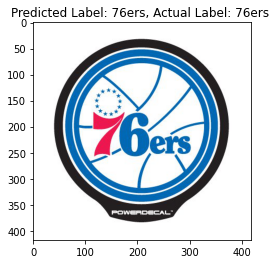

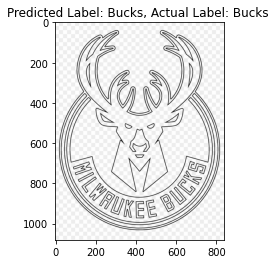

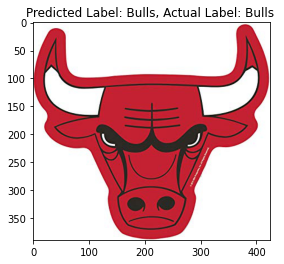

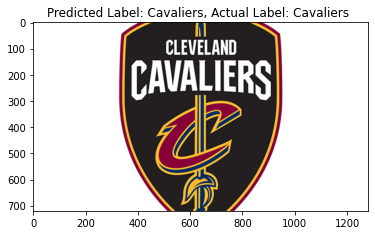

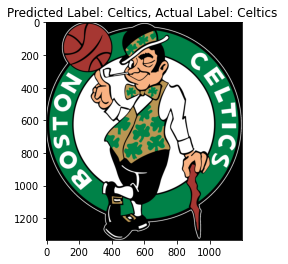

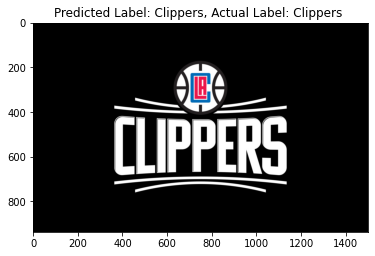

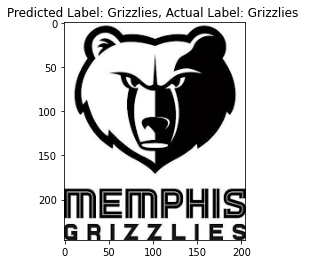

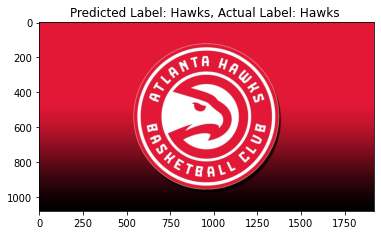

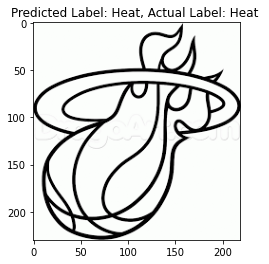

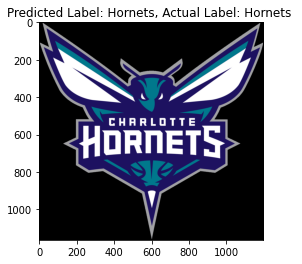

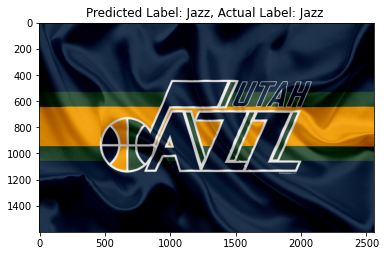

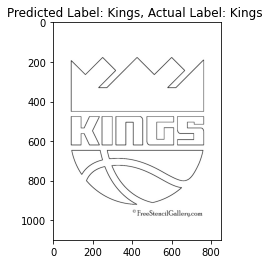

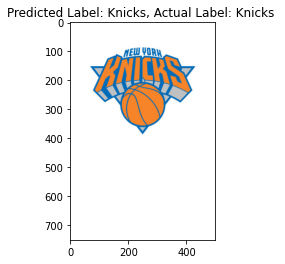

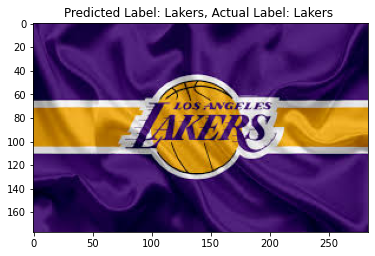

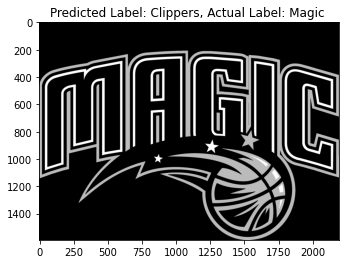

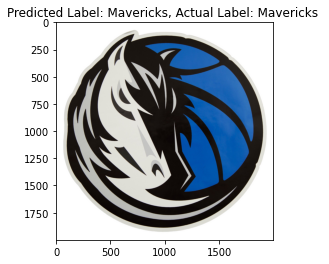

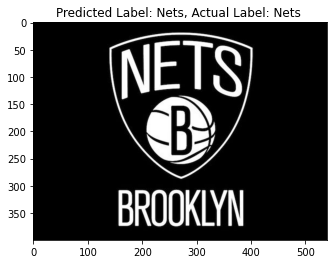

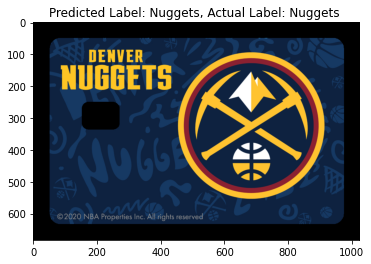

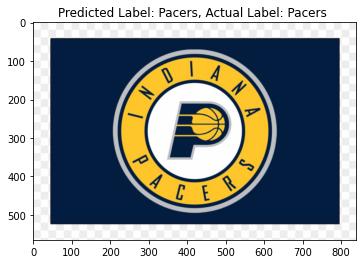

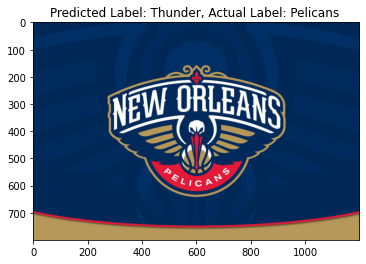

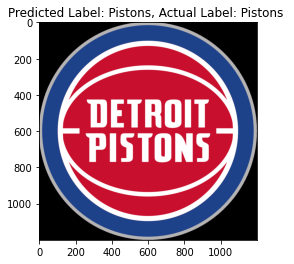

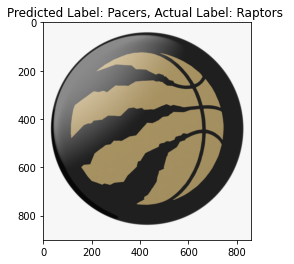

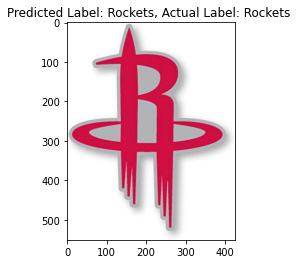

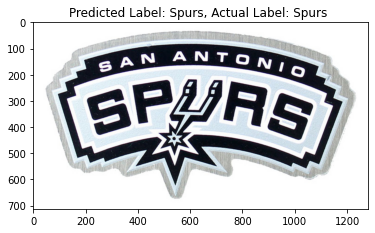

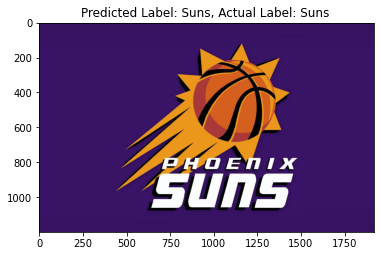

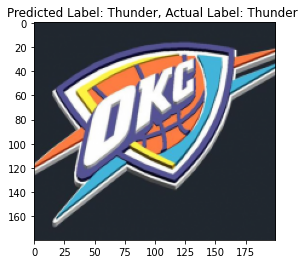

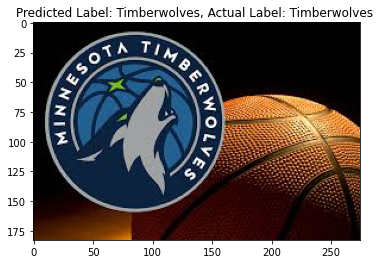

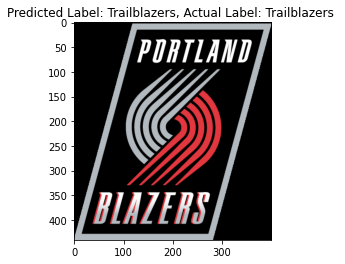

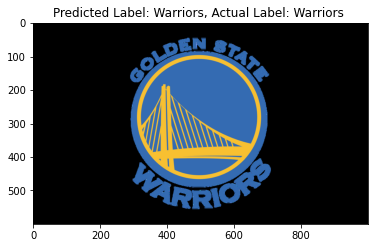

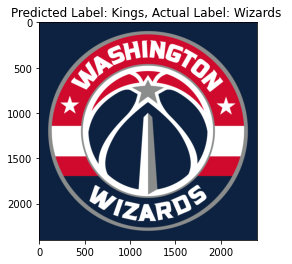

In [25]:
#get prediction for each single test data
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
sample_dict = {}
limit = 5
start = 0
figureCount = 0
for building in buildingCodes:
  y_pred = []
  y_true = []
  dataframe = pd.DataFrame(test.iloc[start:limit,:])
  predict_gen = ImageDataGenerator(rescale = 1./255, fill_mode='nearest',width_shift_range=0.2,
    height_shift_range=0.2)
  predict_generator = predict_gen.flow_from_dataframe(dataframe,x_col= "x_col", y_col = "y_col", target_size=(500,500), batch_size=5)
  probs = new_model.predict(predict_generator)
  count = 0
  for i in range(start,limit):
    index = np.argmax(probs[count])
    y_true.append(building)
    y_pred.append(buildingCodes[index])
    if count == 0:
      plt.figure(figureCount)
      plt.title("Predicted Label: %s, Actual Label: %s " % (buildingCodes[index],building))
      figureCount += 1
      img = image.load_img(dataframe['x_col'][i])
      x = image.img_to_array(img)
      plt.imshow(x / 255)
    count += 1
    

    
  limit += 5
  start += 5
  sample_dict[building] = [y_true,y_pred]

In [0]:
from sklearn.metrics import confusion_matrix
full_y_true = []
full_y_pred = []
scores = {}
for key in sample_dict:
  full_y_true += sample_dict[key][0]
  full_y_pred += sample_dict[key][1]
matrix = confusion_matrix(full_y_true, full_y_pred, buildingCodes)

In [0]:
def printCM(cm, classes):
    df = pd.DataFrame(data = cm, columns = classes, index = classes)
    df.index.name = "Actual"
    df.columns.name = "Predicted"
    return df

In [24]:
printCM(matrix, buildingCodes)

Predicted,76ers,Bucks,Bulls,Cavaliers,Celtics,Clippers,Grizzlies,Hawks,Heat,Hornets,Jazz,Kings,Knicks,Lakers,Magic,Mavericks,Nets,Nuggets,Pacers,Pelicans,Pistons,Raptors,Rockets,Spurs,Suns,Thunder,Timberwolves,Trailblazers,Warriors,Wizards
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
76ers,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bucks,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Bulls,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Cavaliers,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Celtics,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Clippers,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Grizzlies,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
Hawks,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Heat,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
